# Marts Exploratory Analysis

This notebooks is used to run some basic analysis on the two marts and report some metrics.

Input data:
- trial_activation Mart
- trial_goals Mart

Output insights:
- Trial Activation rate
- Goal Completion rate
- Missing goal for closest-to-activate
- Average time from first to last activity in trial period
- Activation rate per month of starting

In [21]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [22]:

conn = psycopg2.connect(
    dbname='planday',
    user='test',
    password='test',
    host='localhost',
    port='5432'
)

# Query the data from trial_goals and trial_activation tables
trial_goals_query = "SELECT * FROM planday.trial_goals;"
trial_activation_query = "SELECT * FROM planday.trial_activation;"

trial_goals_df = pd.read_sql(trial_goals_query, conn)
trial_activation_df = pd.read_sql(trial_activation_query, conn)

# Close the database connection
conn.close()

/var/folders/22/b27481397lg7wj6hbksr4vqr0000gn/T/ipykernel_68088/999327945.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  trial_goals_df = pd.read_sql(trial_goals_query, conn)
/var/folders/22/b27481397lg7wj6hbksr4vqr0000gn/T/ipykernel_68088/999327945.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  trial_activation_df = pd.read_sql(trial_activation_query, conn)


In [23]:
#Activation Rate
trial_activation_rate = trial_activation_df['is_trial_activated'].mean() * 100
print(f"Trial Activation Rate: {trial_activation_rate:.2f}% ({trial_activation_df['is_trial_activated'].sum()}/{len(trial_activation_df)})")

Trial Activation Rate: 4.08% (38/931)


Distribution of Number of Goals Completed:
num_goals_completed
0    349
1    339
2    104
4     51
3     50
5     38
Name: count, dtype: int64


[Text(0, 0, '349'),
 Text(0, 0, '339'),
 Text(0, 0, '104'),
 Text(0, 0, '51'),
 Text(0, 0, '50'),
 Text(0, 0, '38')]

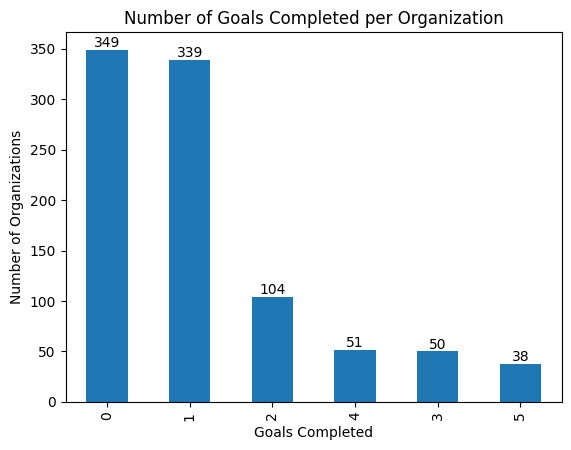

In [24]:
# Count the number of goals completed per organization
goals = ['shift_created_goal', 'employee_invited_goal', 'punch_in_goal','punch_in_approved_goal', 'advanced_viewed_goal']
trial_goals_df['num_goals_completed'] = trial_goals_df[goals].sum(axis=1)

# Distribution of number of goals completed
goal_completion_distribution = trial_goals_df['num_goals_completed'].value_counts()
print("Distribution of Number of Goals Completed:")
print(goal_completion_distribution)

# Plot the distribution
ax = goal_completion_distribution.plot(kind='bar')
plt.title('Number of Goals Completed per Organization')
plt.xlabel('Goals Completed')
plt.ylabel('Number of Organizations')
ax.bar_label(ax.containers[0])

Goal Completion Rates:
shift_created_goal        56.176155
employee_invited_goal     22.126745
punch_in_goal             15.574651
advanced_viewed_goal      14.930183
punch_in_approved_goal     8.378088
dtype: float64


[Text(0, 0, '56.1762'),
 Text(0, 0, '22.1267'),
 Text(0, 0, '15.5747'),
 Text(0, 0, '8.37809'),
 Text(0, 0, '14.9302')]

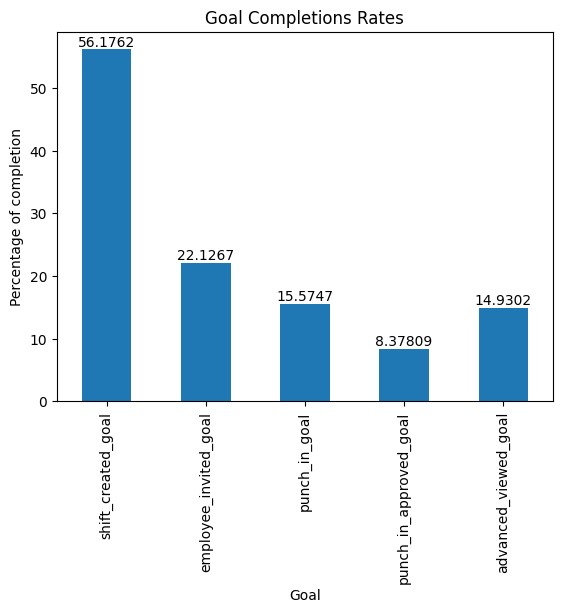

In [25]:
#Completion Rate for each goal
goals = ['shift_created_goal', 'employee_invited_goal', 'punch_in_goal',
       'punch_in_approved_goal', 'advanced_viewed_goal']
goal_completion_rates = trial_goals_df[goals].mean() * 100
print("Goal Completion Rates:")
print(goal_completion_rates.sort_values(ascending=False))
ax = goal_completion_rates.plot.bar()
plt.title('Goal Completions Rates')
plt.xlabel('Goal')
plt.ylabel('Percentage of completion')
ax.bar_label(ax.containers[0])

The most frequent completed goal is shift_created_goal, which gets completed by 56% percent of trial organizations

349 companies have completed no goal at all.

In [26]:
trial_goals_df['completed_goals'] = trial_goals_df[goals].sum(axis=1)

[Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '17'),
 Text(0, 0, '27')]

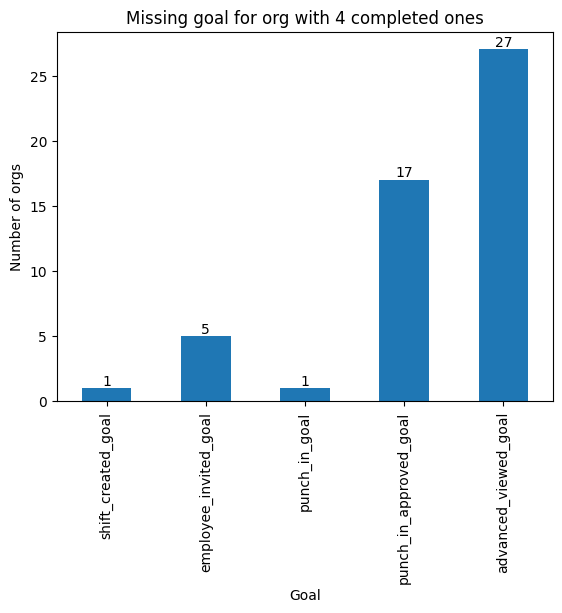

In [27]:
four_completed_goals_df = trial_goals_df[trial_goals_df['completed_goals'] == 4]
ax = (len(four_completed_goals_df) - four_completed_goals_df[goals].sum()).plot.bar()
plt.title('Missing goal for org with 4 completed ones')
plt.xlabel('Goal')
plt.ylabel('Number of orgs')
ax.bar_label(ax.containers[0])

I think we can observe an interesting pattern here, by comparing this last plot and the "Goal Completions Rates" one.
punch_in_goal and advanced_view_goal had similar completion rate. However advance_viewed_goal is the most frequent "missing goal" for organisations that completed all the remaining 4 goals.

[Text(0, 0, '1'),
 Text(0, 0, '7'),
 Text(0, 0, '23'),
 Text(0, 0, '47'),
 Text(0, 0, '22')]

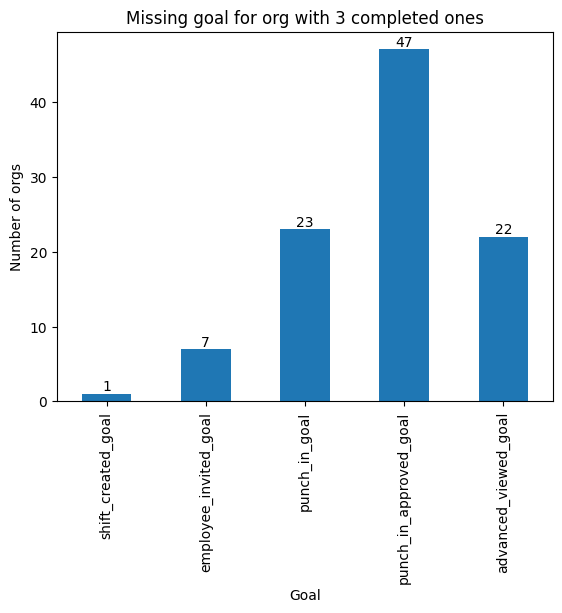

In [28]:
three_completed_goals_df = trial_goals_df[trial_goals_df['completed_goals'] == 3]
ax = (len(three_completed_goals_df) - three_completed_goals_df[goals].sum()).plot.bar()
plt.title('Missing goal for org with 3 completed ones')
plt.xlabel('Goal')
plt.ylabel('Number of orgs')
ax.bar_label(ax.containers[0])

In [29]:
trial_activation_df.head()

,organization_id,is_trial_activated,max_timestamp,min_timestamp,trial_timedelta
0,0defb38f3dd9d412e4baefadc45e0984,False,2024-03-27 21:43:11.697,2024-03-27 21:43:11.697,0 days 00:00:00
1,2aba4ededbc9ee02d119fe6e3a4cb73a,False,2024-03-26 22:36:33.000,2024-03-22 07:09:15.193,4 days 15:27:17.807000
2,30d5b8d040547ed5a4c8ea26a67e3250,False,2024-02-21 23:30:47.000,2024-02-21 23:30:47.000,0 days 00:00:00
3,3a41e7592824df07caa6b0fb1e17ddf9,False,2024-02-07 15:49:53.000,2024-02-07 12:49:16.000,0 days 03:00:37
4,0b09b796e6f4f892d53af598bb92b98d,False,2024-02-28 10:33:04.000,2024-02-20 07:58:17.397,8 days 02:34:46.603000


In [30]:
trial_activation_df['trial_duration_days'] = trial_activation_df['trial_timedelta'].dt.days
trial_activation_df['trial_duration_hours'] = trial_activation_df['trial_timedelta'].dt.total_seconds()/3600
trial_activation_df['trial_duration_hours'].value_counts()

trial_duration_hours
0.000000      227
0.010000        3
0.008333        2
0.011341        1
501.791358      1
             ... 
21.870453       1
577.537500      1
0.161528        1
0.002571        1
0.012480        1
Name: count, Length: 702, dtype: int64

In [31]:
print(f"Average span of time from first to last activity: {trial_activation_df['trial_duration_days'].mean()}")

Average span of time from first to last activity: 5.313641245972073


In [32]:
trial_activation_df['starting_month'] = trial_activation_df['min_timestamp'].dt.strftime('%Y%m')
grouped_by_month = trial_activation_df.groupby('starting_month').agg({
    'organization_id': 'count',   # Count the number of unique organizations
    'is_trial_activated': 'sum'   # Sum the values in the is_trial_activated column
})
grouped_by_month

,organization_id,is_trial_activated
starting_month,,
202401,274,12
202402,343,12
202403,306,13
202404,8,1


[Text(0, 0, '0.0437956'),
 Text(0, 0, '0.0349854'),
 Text(0, 0, '0.0424837'),
 Text(0, 0, '0.125')]

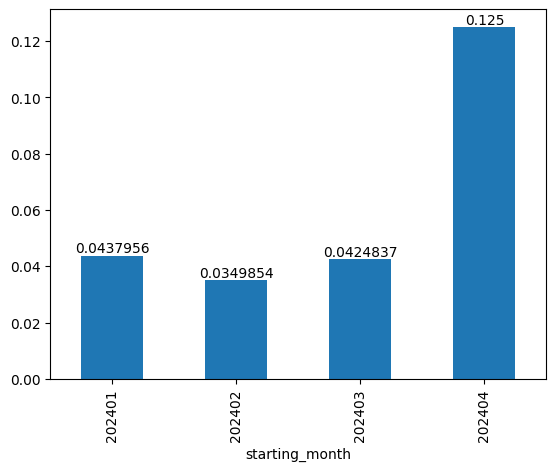

In [33]:
grouped_by_month['monthly_activation_rate'] = grouped_by_month['is_trial_activated']/grouped_by_month['organization_id']
ax = grouped_by_month['monthly_activation_rate'].plot.bar()
ax.bar_label(ax.containers[0])

Besides April 2024, with an extremely small sample, the activation rates for organisations starting in different months is similar. There's a small dip for February.
The reason might be the small number of trial_activated companies for each month and the fact that February had a higher number of organisations that performed their first activity in that month.

Average Time to Activation: 26.18 days


/var/folders/22/b27481397lg7wj6hbksr4vqr0000gn/T/ipykernel_68088/2382000726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_trial_activated_df['trial_duration_days'] = is_trial_activated_df['trial_timedelta'].dt.days


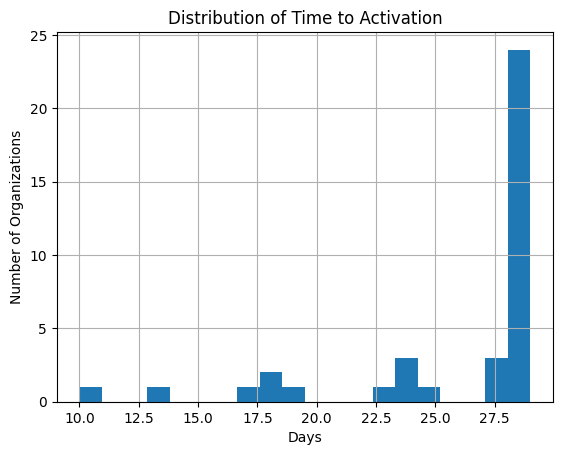

In [34]:
#This analysis initially assumed that the data source was stopping tracking once a company activated
#As explained in the README, the data does not show that.
#So, this analysis CAN BE IGNORED. Just keeping it for completeness

is_trial_activated_df = trial_activation_df[trial_activation_df['is_trial_activated']]
is_trial_activated_df['trial_duration_days'] = is_trial_activated_df['trial_timedelta'].dt.days

# Average time to activation
print(f"Average Time to Activation: {is_trial_activated_df['trial_duration_days'].mean():.2f} days")


is_trial_activated_df['trial_duration_days'].hist(bins=20)
plt.title('Distribution of Time to Activation')
plt.xlabel('Days')
plt.ylabel('Number of Organizations')
plt.show()
